In [12]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [14]:
# Required code from previous chapters
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [1]:
# Calculating percentile rank for standardized tests
def PercentileRank(scores, your_score):
    ''' Function that calculates the percentile rank given a list of scores, 
    and your result in a test''''
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1
    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

In [3]:
# Let's create a scenario to apply the above function
scores = [55, 66, 77, 88, 99]
you = 88
PercentileRank(scores, you)

80.0

In [5]:
def Percentile2(scores, percentile_rank):
    '''Function that calculates your score in a test, given a list of scores,
    and your percentile rank'''
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100
    return scores[index]

In [6]:
def EvalCdf(sample, x):
    '''This function calculates the probability of getting a result in a range 0-1'''
    count = 0.0
    for value in sample:
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

In [10]:
# Understanding how the function above (EvalCdf) works
sample = [1, 2, 2, 3, 5]
EvalCdf(sample, 0)
EvalCdf(sample, 1)
EvalCdf(sample, 2)

0.6

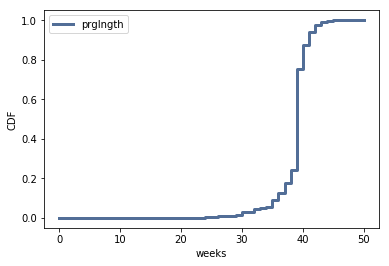

In [16]:
#The following code makes a Cdf for the distribution of pregnancy lengths in the NSFG
lives, firsts, others = first.MakeFrames()
cdf = thinkstats2.Cdf(live.prglngth, label='prglngth')

# Use thinkplot function named Cdf to plot Cdfs as lines
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel='weeks', ylabel='CDF')

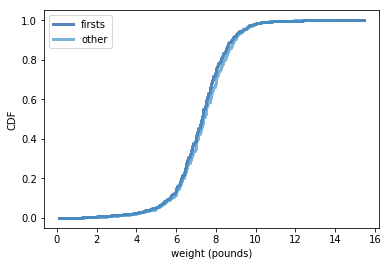

In [22]:
#Compare distribution of birth weight for first babies and others
first_cdf = thinkstats2.Cdf(firsts.totalwgt_lb, label='firsts')
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label='other')
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel='weight (pounds)', ylabel='CDF')

We can see that first babies are slightly lighter throughout the distribution.

# 4.7 Random Numbers

No handlers could be found for logger "matplotlib.legend"


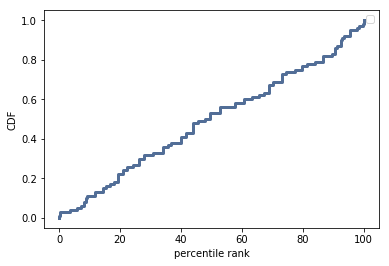

In [25]:
# Let's choose a random sample from the population of live births and look up the percentile rank of their birth weights  


weights = live.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label='totalwgt_lb')
# generate a sample and compute the percentile rank
# sample is a random sample of 100 birth weights, chosen with replacement
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

#make and plot the Cdf of the percentile ranks
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel='percentile rank', ylabel='CDF')

# 4.8 Comparing percentile ranks

In [26]:
def PositionToPercentile(position, field_size):
    '''Given a position and field size, compute percentile rank'''
    beat = field_size - positiom + 1
    percentile = 100.00 * beat / field_size
    return percentile

In [27]:
def PercentileToPosition(percentile, field_size):
    '''Given a percentile rank and field size, compute position'''
    beat = position * field_size / 100.0
    position = field_size - beat + 1
    return position

# Exercises

In [31]:
#4.1
other_cdf.PercentileRank(9.8)

97.2620320855615

In [43]:
#4.2
sample = np.random.random(1000)
pmf = thinkstats2.Pmf(sample)
thinkplot.Pmf(pmf, linewidth=0.2)
thinkplot.Config(xlabel='Random variate', ylabel='PMF')
thinkplot.Save('4-1', formats=['png'])

Writing 4-1.png


In [44]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Random variate', ylabel='CDF')
thinkplot.Save('4-2', formats=['png'])

Writing 4-2.png
